<a href="https://colab.research.google.com/github/JuanPaBL2/Machine-Learning-Projects/blob/main/Proyecto_1_REGRESION_LOGISTICA_(Venta_Casas_B%C3%A9lgica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREAR DATAFRAME

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#realizar análisis de componentes principales.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
#aprendizaje supervisado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler

#___________DATAFRAME______________________________

url_csv = ('https://raw.githubusercontent.com/kaiyungtan/Real-Estate-data-analysis/master/data/raw/dataset_house_apartment.csv')

df = pd.read_csv(url_csv)

df.head()

,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year
0,1050,house,house,340000,for sale,6.0,203,1,None,0,1,None,0,None,95.0,None,2,0,to be done up,1901
1,1880,house,villa,525000,for sale,6.0,250,1,None,0,1,40,1,430,826.0,None,4,0,as new,1992
2,4900,house,exceptional property,550000,for sale,11.0,475,1,None,0,1,None,1,1400,1543.0,None,4,0,good,1853
3,7912,house,villa,550000,for sale,4.0,325,1,None,0,1,125,1,2333,3570.0,None,4,0,good,1918
4,6032,house,house,550000,for sale,5.0,400,1,None,0,1,80,1,500,616.0,None,3,0,as new,1977


# ANALISIS EXPLORATORIO


En esta exploracion de datos, visualizo estadisticas descriptivas, tipo de dato de las variables, observo valores nulos por defecto y valores nulos designados por mi.

**Informacion:** En este apartado observo que muchas variables importantes para graficar y aplicar modelo de regresion contienen tipo de dato OBJET, dato que no es muy eficiente para procesar y manipular.

**Valores nulos:** Observo que .isnull() no arroja el total de nulos, ya que en el descenlace del codigo, especificamente en partes de grafica me encuentro con problemas referidos a datos incorrectos, siendo que estaba correctamente aplicado dropna(). Entiendo que el dataframe contiene valores None como cadena de texto, los interpreto como nulos y por lo tanto decido transformarlos a valor nulo mediante un bucle for para finalmente poder visualizarlos como nulos con isnull().





In [ ]:
#estadisticas descriptivas
statics = df.describe()
print("ESTADISTICAS DESCRIPTIVAS")
display(statics)
print("\n")

#tipo de dato de las variables
print("INFORMACION")
info = df.info()
display(info)

#valores nulos del dataframe
ver_nulos2 = df.isnull().sum()
print(f"\nVALORES NULOS\n\n{ver_nulos2}\n")

#valores nones del dataframe
for columna in df.columns:
    df[columna] = df[columna].replace('None', None)

nones = df.isnull().sum()
print(f"VALORES NONE\n\n{nones}\n")

ESTADISTICAS DESCRIPTIVAS


,locality,number_of_rooms,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,swimming_pool
count,52077.000000,52075.000000,52077.000000,52077.000000,52077.000000,52077.000000,29353.000000,52077.000000
mean,5406.222728,2.814575,0.652284,0.046950,0.563569,0.289859,992.812046,0.015957
std,2958.590968,2.202981,0.476250,0.211533,0.495947,0.453701,5026.021908,0.125311
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2600.000000,2.000000,0.000000,0.000000,0.000000,0.000000,142.000000,0.000000
50%,5060.000000,3.000000,1.000000,0.000000,1.000000,0.000000,350.000000,0.000000
75%,8430.000000,3.000000,1.000000,0.000000,1.000000,1.000000,810.000000,0.000000
max,9992.000000,204.000000,1.000000,1.000000,1.000000,1.000000,400000.000000,1.000000




INFORMACION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52077 entries, 0 to 52076
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality                     52077 non-null  int64  
 1   type_of_property             52077 non-null  object 
 2   subtype_of_property          52077 non-null  object 
 3   price                        52077 non-null  object 
 4   type_of_sale                 52077 non-null  object 
 5   number_of_rooms              52075 non-null  float64
 6   house_area                   52077 non-null  object 
 7   fully_equipped_kitchen       52077 non-null  int64  
 8   furnished                    52077 non-null  object 
 9   open_fire                    52077 non-null  int64  
 10  terrace                      52077 non-null  int64  
 11  terrace_area                 52077 non-null  object 
 12  garden                       52077 non-null  int64  
 13  ga

None


VALORES NULOS

locality                           0
type_of_property                   0
subtype_of_property                0
price                              0
type_of_sale                       0
number_of_rooms                    2
house_area                         0
fully_equipped_kitchen             0
furnished                          0
open_fire                          0
terrace                            0
terrace_area                       0
garden                             0
garden_area                        0
surface_of_the_land            22724
surface_of_the_plot_of_land        0
number_of_facades                  0
swimming_pool                      0
state_of_the_building              0
construction_year                  0
dtype: int64

VALORES NONE

locality                           0
type_of_property                   0
subtype_of_property                0
price                              0
type_of_sale                       0
number_of_rooms                

# LIMPIEZA Y PROCESAMIENTO


Limpio valores nulos, chequeo que la limpieza se haya efectuado de forma correcta y visualizo el dataframe procesado. Tambien decido suprimir algunas columnas que no voy a utilizar y cambio el tipo de dato de algunas variables a otros con mayor poder de manipulacion y eficiencia.

In [ ]:
#limpiar nulos
df1 = df.dropna()

#ver limpieza de nones
nones = df1.isnull().sum()
print(f"VALORES NONE\n\n{nones}\n")

#ver limpieza de nulos
ver_nulos = df1.isnull().sum()
print(f"\nVALORES NULOS\n\n{ver_nulos}\n")

#ver dataframe limpio y procesado
print("DATAFRAME LIMPIO Y PROCESADO\n")
display(df1.head(10))


VALORES NONE

locality                       0
type_of_property               0
subtype_of_property            0
price                          0
type_of_sale                   0
number_of_rooms                0
house_area                     0
fully_equipped_kitchen         0
furnished                      0
open_fire                      0
terrace                        0
terrace_area                   0
garden                         0
garden_area                    0
surface_of_the_land            0
surface_of_the_plot_of_land    0
number_of_facades              0
swimming_pool                  0
state_of_the_building          0
construction_year              0
dtype: int64


VALORES NULOS

locality                       0
type_of_property               0
subtype_of_property            0
price                          0
type_of_sale                   0
number_of_rooms                0
house_area                     0
fully_equipped_kitchen         0
furnished                      0

,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year
0,1050,house,house,340000,for sale,6.0,203,1,0,0,1,0,0,0,95.0,0,2,0,to be done up,1901
1,1880,house,villa,525000,for sale,6.0,250,1,0,0,1,40,1,430,826.0,0,4,0,as new,1992
2,4900,house,exceptional property,550000,for sale,11.0,475,1,0,0,1,0,1,1400,1543.0,0,4,0,good,1853
3,7912,house,villa,550000,for sale,4.0,325,1,0,0,1,125,1,2333,3570.0,0,4,0,good,1918
4,6032,house,house,550000,for sale,5.0,400,1,0,0,1,80,1,500,616.0,0,3,0,as new,1977
5,1650,house,villa,525000,for sale,4.0,220,1,0,1,1,0,1,0,1600.0,0,4,0,good,1990
6,1325,house,house,535000,for sale,6.0,303,1,0,0,1,30,1,650,810.0,0,4,0,as new,1996
7,4053,house,villa,385000,for sale,6.0,442,0,0,0,0,0,1,2200,2704.0,0,0,0,to renovate,1952
8,1332,house,villa,549000,for sale,4.0,210,1,0,0,1,0,1,1890,2004.0,0,4,0,as new,1992
9,8310,house,villa,519000,for sale,3.0,273,1,0,1,0,0,1,303,591.0,0,4,0,as new,1996


In [ ]:
#eliminar algunas columnas
columnas = ["state_of_the_building", "subtype_of_property", "type_of_property", "type_of_sale"]

df2 = df1.drop(columnas, axis=1)
df2.head()

,locality,price,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,construction_year
0,1050,340000,6.0,203,1,0,0,1,0,0,0,95.0,0,2,0,1901
1,1880,525000,6.0,250,1,0,0,1,40,1,430,826.0,0,4,0,1992
2,4900,550000,11.0,475,1,0,0,1,0,1,1400,1543.0,0,4,0,1853
3,7912,550000,4.0,325,1,0,0,1,125,1,2333,3570.0,0,4,0,1918
4,6032,550000,5.0,400,1,0,0,1,80,1,500,616.0,0,3,0,1977


In [ ]:
#cambio el tipo de dato de algunas columnas para facilitar la grafica
df2["house_area"] = pd.to_numeric(df2["house_area"], errors='coerce')

df2["number_of_facades"] = pd.to_numeric(df2["number_of_facades"], errors='coerce')

df2["price"] = pd.to_numeric(df2["price"], errors='coerce')

df2["construction_year"] = pd.to_datetime(df2["construction_year"])

#quito los 0 de algunas columnas para ver reflejado mejor el dato real
columnas_eliminar_cero = ['construction_year', 'number_of_rooms', 'surface_of_the_land', 'house_area', 'price']

def eliminarCeros(df, columnas_eliminar):
  df_copy = df.copy()
  for columna in columnas_eliminar:
    df_copy = df_copy[df_copy[columna] != 0]
  return df_copy

df_sin_ceros = eliminarCeros(df2, columnas_eliminar_cero)

#chequear cambio de tipo de dato
print("INFORMACION")
info2 = df2.info()
print(info2)

df3 = df2.dropna()

INFORMACION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52077 entries, 0 to 52076
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   locality                     52077 non-null  int64         
 1   price                        52007 non-null  float64       
 2   number_of_rooms              52077 non-null  float64       
 3   house_area                   52077 non-null  int64         
 4   fully_equipped_kitchen       52077 non-null  int64         
 5   furnished                    52077 non-null  int64         
 6   open_fire                    52077 non-null  int64         
 7   terrace                      52077 non-null  int64         
 8   terrace_area                 52077 non-null  object        
 9   garden                       52077 non-null  int64         
 10  garden_area                  52077 non-null  object        
 11  surface_of_the_land          

# ANALISIS VARIADO Y MULTIVARIADO

ANALISIS UNIVARIADO.

En el analisis univariado, aplico grafico de linea y frecuencia. Primero filtro las variables a utilizar, las ordeno y tomo el promedio de precio por año.

**Grafico de lineas:** En el observo las tendencias de precio con el paso del tiempo, me interesa ver en profundidad la tendencia de precios en el rango de fechas 1980-2020 ya que observo una especie de mercado bajista.

**Grafico de frecuencia:** En este analisis observo las frecuencias de los valores de algunas variables.



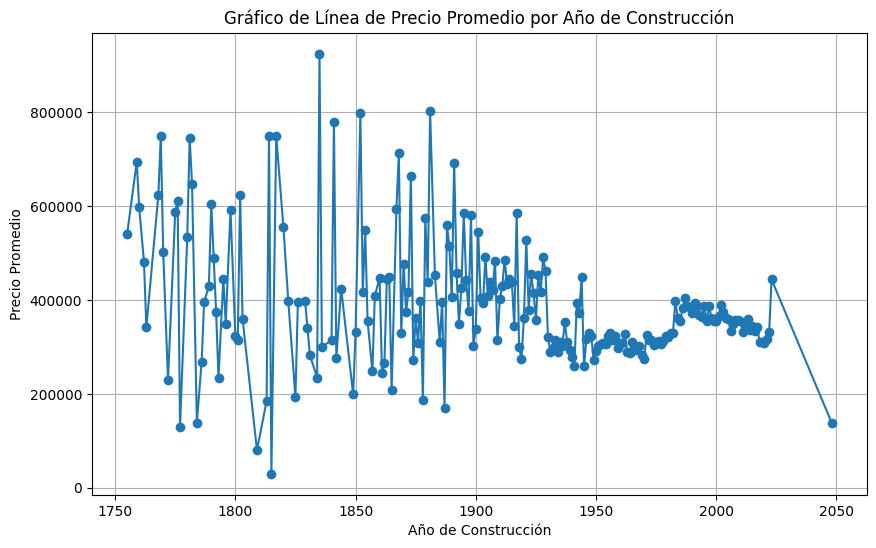

In [ ]:
#______ANALISIS  DE LINEAS_______

df4 = df3[["price", "construction_year"]]

df5 = df4.sort_values(by='construction_year', ascending = True)

df_grouped = df5.groupby(df5['construction_year'].dt.year)['price'].mean().reset_index()

# Crea el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['construction_year'], df_grouped['price'], marker='o', linestyle='-')

# Etiquetas de los ejes y título
plt.xlabel('Año de Construcción')
plt.ylabel('Precio Promedio')
plt.title('Gráfico de Línea de Precio Promedio por Año de Construcción')

# Muestra el gráfico
plt.grid(True)
plt.show()

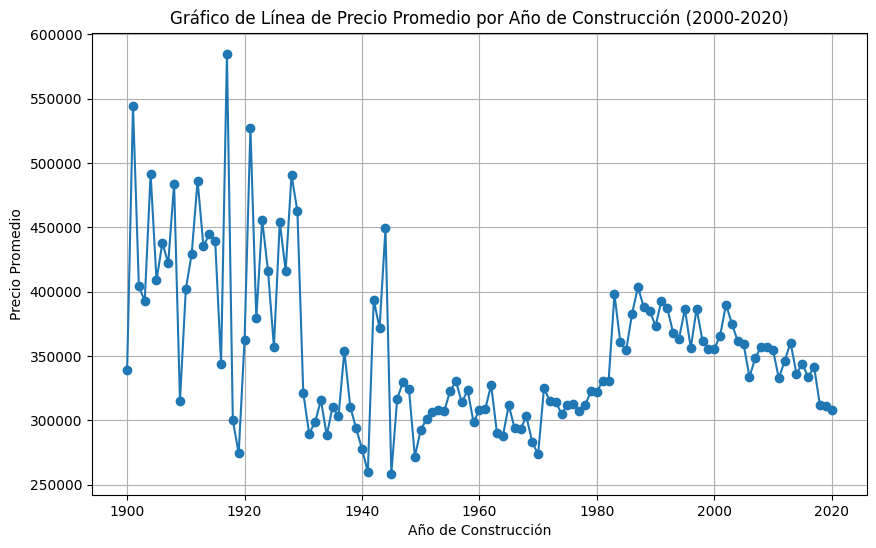

In [ ]:
#______ANALISIS  DE LINEAS de un RANGO DE AÑOS_______

# Define el rango de años que te interesa
año_inicio = pd.to_datetime('1900-01-01')
año_fin = pd.to_datetime('2020-01-01')

# Crea una máscara para filtrar las filas dentro del rango de años
mask = (df3['construction_year'] >= año_inicio) & (df3['construction_year'] <= año_fin)

# Filtra los datos
df_filtrado = df3[mask]

# Agrupa por año y calcula el precio promedio
df_grouped = df_filtrado.groupby(df_filtrado['construction_year'].dt.year)['price'].mean().reset_index()

# Crea el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['construction_year'], df_grouped['price'], marker='o', linestyle='-')

# Etiquetas de los ejes y título
plt.xlabel('Año de Construcción')
plt.ylabel('Precio Promedio')
plt.title('Gráfico de Línea de Precio Promedio por Año de Construcción (2000-2020)')

# Muestra el gráfico
plt.grid(True)
plt.show()

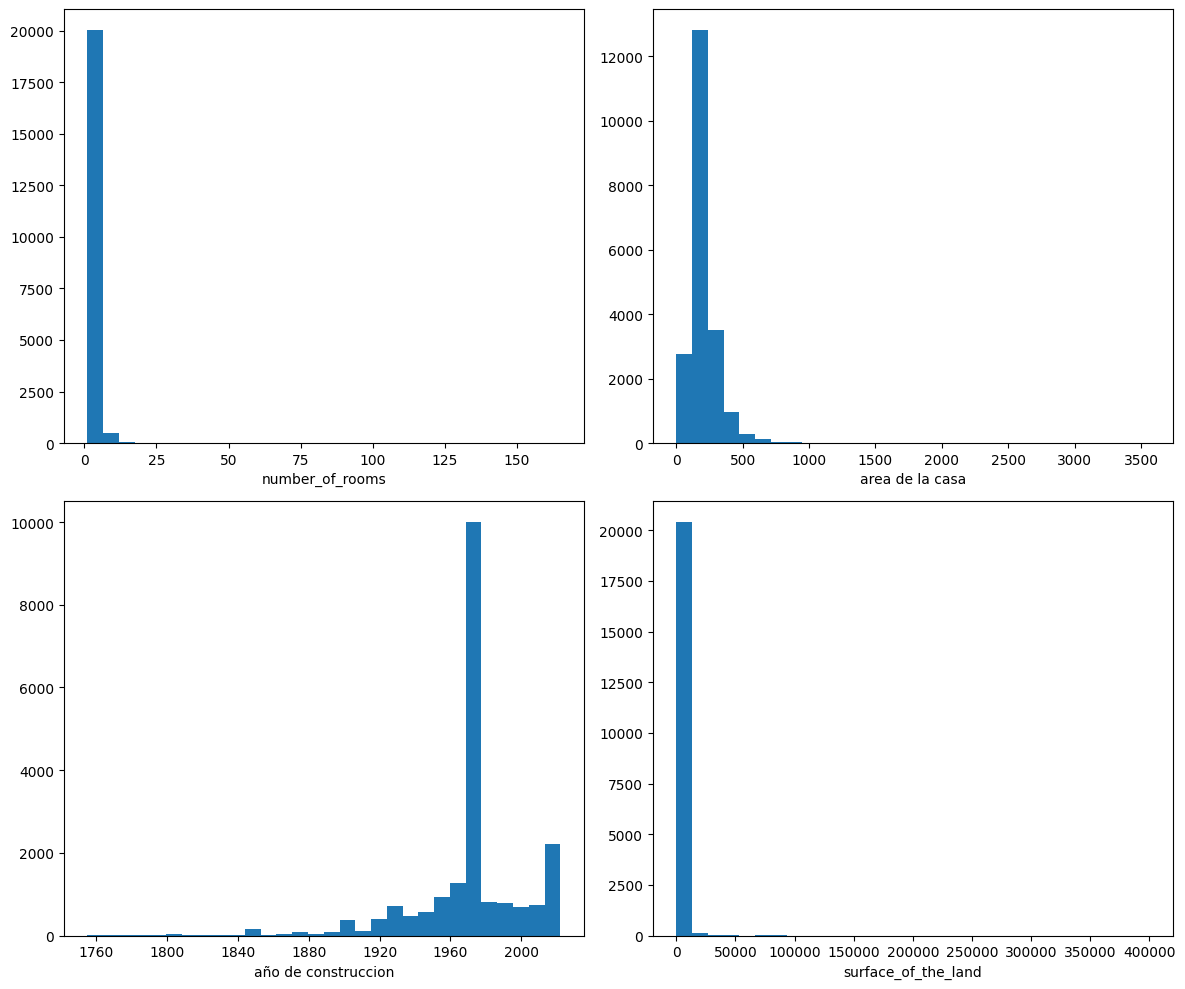

In [ ]:
#_____ANALISIS DE FRECUENCIA_____

plt.figure(figsize = (12,10))

plt.subplot(2, 2, 1)
plt.hist(df_sin_ceros["number_of_rooms"], bins=30)
plt.xlabel('number_of_rooms')
plt.title('')

plt.subplot(2, 2, 2)
plt.hist(df_sin_ceros["house_area"], bins=30)
plt.xlabel('area de la casa')
plt.title('')

plt.subplot(2, 2, 3)
plt.hist(df_sin_ceros["construction_year"], bins=30)
plt.xlabel('año de construccion')
plt.title('')

plt.subplot(2, 2, 4)
plt.hist(df_sin_ceros['surface_of_the_land'], bins=30)
plt.xlabel('surface_of_the_land')
plt.title('')

#EJecutar
plt.tight_layout()
plt.show()

ANALISIS MULTIVARIADO

En este tipo de analisis, uso dos tipos de analisis:

Matriz de correlacion: En la matriz puedo observar una fuerte relacion entre la variable localidad y pileta, entiendo que puede ser en zonas de mayor temperatura las casas suelen tener pileta.

Matriz de covarianza: En esta matriz, observo una fuerte relacion lineal entre la variable precio y año de construccion, donde el paso del tiempo influye fuertemente en el alza de precios.

<ipython-input-38-4244625cd4f3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matrix = df3.corr()


                             locality     price  number_of_rooms  house_area  \
locality                     1.000000 -0.139008        -0.024048   -0.063957   
price                       -0.139008  1.000000         0.266116    0.284319   
number_of_rooms             -0.024048  0.266116         1.000000    0.191681   
house_area                  -0.063957  0.284319         0.191681    1.000000   
fully_equipped_kitchen      -0.123908  0.050980         0.007369    0.058197   
furnished                         NaN       NaN              NaN         NaN   
open_fire                   -0.043329  0.168900         0.084695    0.100521   
terrace                     -0.108213  0.135069         0.001852    0.065517   
garden                       0.008130  0.124771         0.111776    0.122281   
surface_of_the_land         -0.003604  0.145902         0.076733    0.072997   
surface_of_the_plot_of_land       NaN       NaN              NaN         NaN   
number_of_facades           -0.102693  0

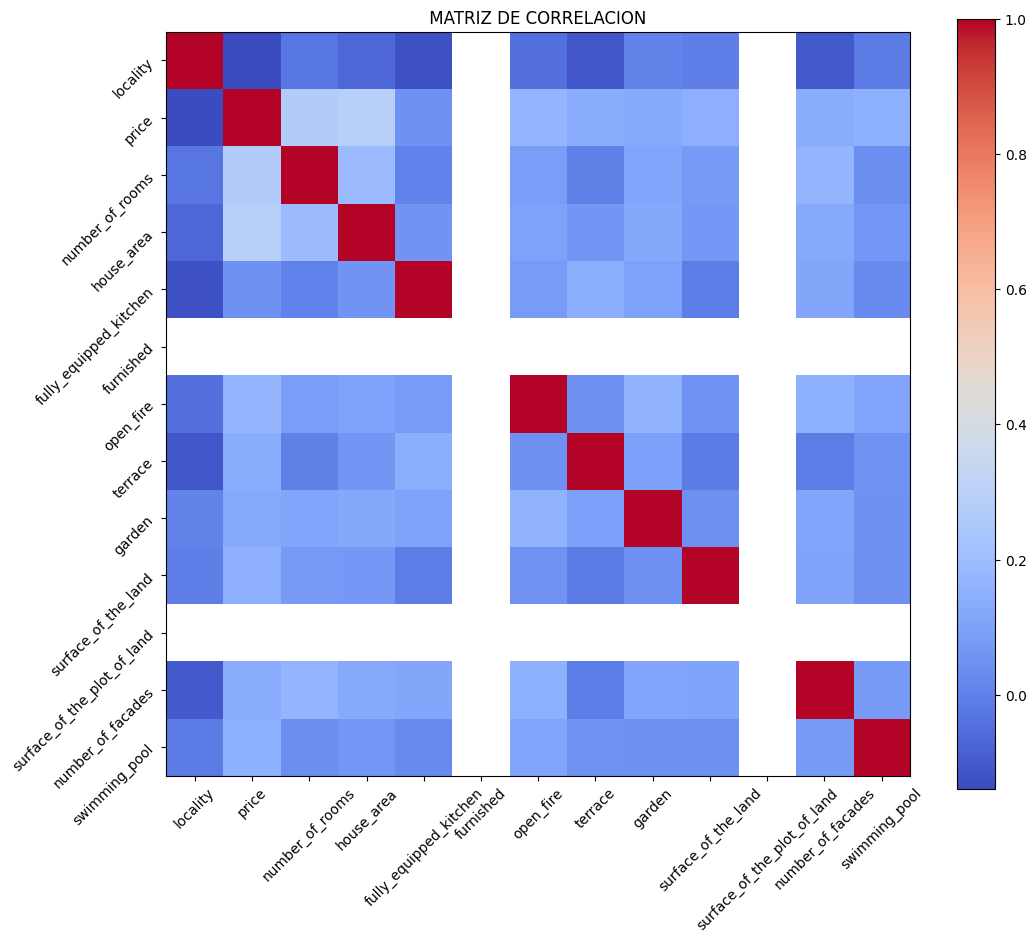

In [ ]:
#MATRIZ DE CORRELACION

correlacion_matrix = df3.corr()
print(correlacion_matrix)

plt.figure(figsize=(12,10))
plt.imshow(correlacion_matrix, cmap='coolwarm', interpolation= "nearest")
plt.colorbar()
plt.xticks(range(len(correlacion_matrix)), correlacion_matrix.columns, rotation=45)
plt.yticks(range(len(correlacion_matrix)), correlacion_matrix.columns, rotation=45)
plt.title(' MATRIZ DE CORRELACION ')
plt.show()

print("\n\n")

                          price  construction_year
price              3.810000e+09     -705924.030166
construction_year -7.059240e+05        1230.166667


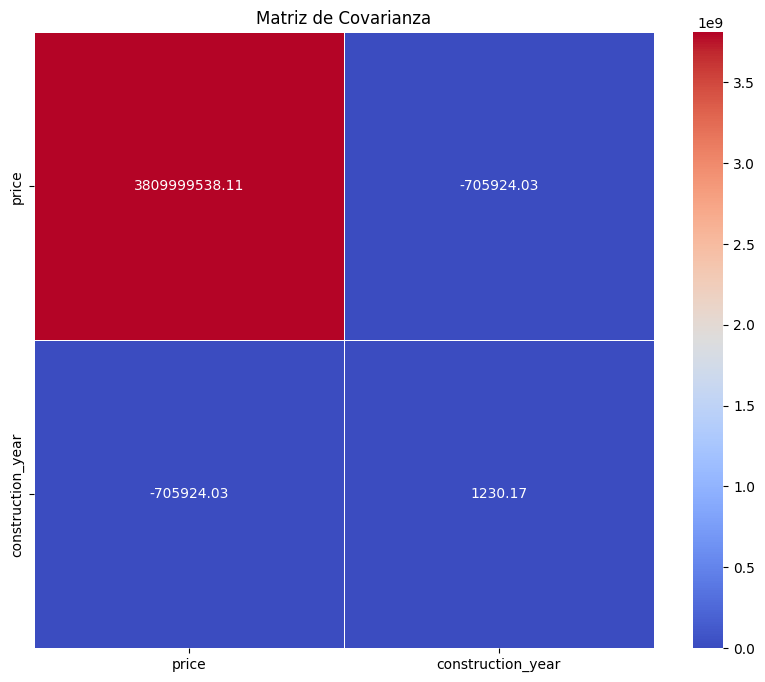


INDICA QUE A MEDIDA QUE EL AÑO DE CONSTRUCCION AUMENTA, EL PRECIO TAMBIEN LO HACE.


In [ ]:
#MATRIZ DE COVARIANZA

columnasMat = ['price', 'construction_year']
cov_matrix = df_grouped[columnasMat].cov()
print(cov_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Matriz de Covarianza")
plt.show()



# APRENDIZAJE NO SUPERVISADO: REDIMENSIONAMIENTO


In [ ]:
#preparo nuevo df para pca

df_41 = df3.dropna()

df_41.head()

#cambio los datos a float
df41 = df_41[['locality', 'price', 'number_of_rooms', 'house_area', 'garden','garden_area',	'surface_of_the_land',	'swimming_pool']].astype(float)


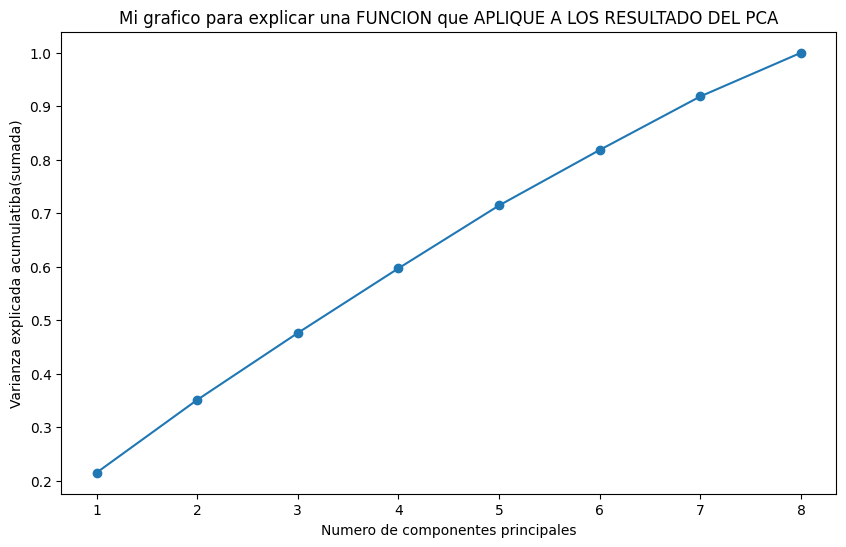

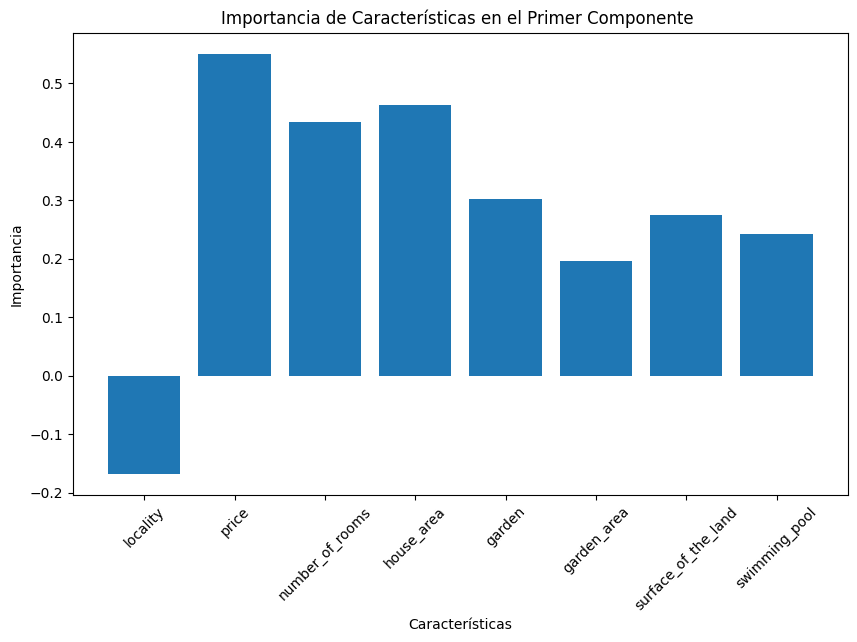

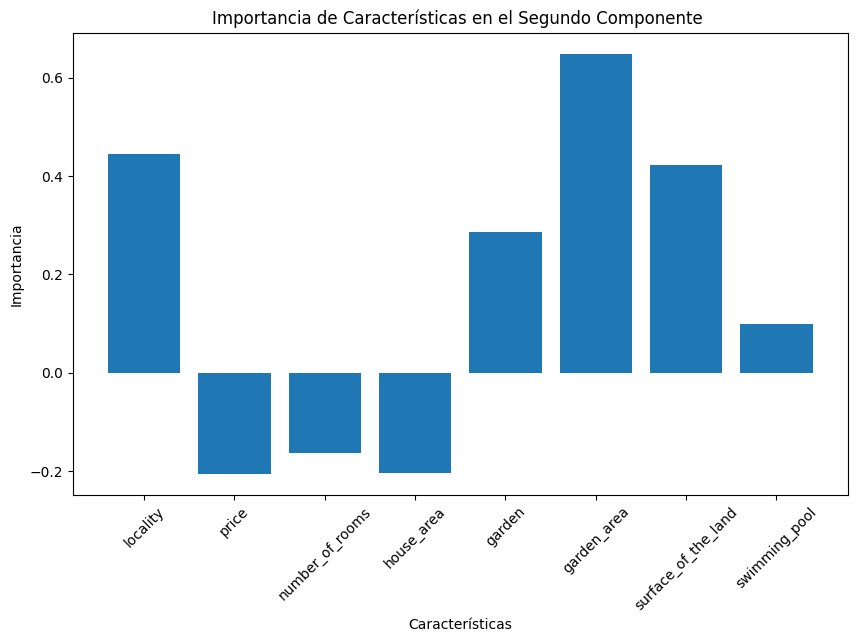




Contribuciones de Características en Cada Componente Principal:


,locality,price,number_of_rooms,house_area,garden,garden_area,surface_of_the_land,swimming_pool
0,-0.167676,0.550956,0.433939,0.463881,0.302912,0.196432,0.274689,0.242999
1,0.445233,-0.205502,-0.164328,-0.204446,0.286728,0.648785,0.421862,0.098142


In [ ]:
#_________________________________REDIMENSIONAMIENTO____________________________

#__________ESTANDARIZACION_________________

features_name = ['locality', 'price', 'number_of_rooms', 'house_area', 'garden','garden_area',	'surface_of_the_land',	'swimming_pool']

scaler = StandardScaler()

mercado_scaled = scaler.fit_transform(df41[features_name])

#__________PCA_____________________________

pca= PCA()

pca.fit(mercado_scaled)

#_________________________________METRICAS DE EVALUACION________________________

#__________VARIANZA EXPLICADA_____________________

explicacion_varianza= pca.explained_variance_ratio_
acumulacion_explicacion_varianza= np.cumsum(explicacion_varianza)

#__________VARIANZA EXPLICADA ACOMULATIVA__________

plt.figure(figsize=(10,6))

plt.plot(range(1,len(acumulacion_explicacion_varianza)+1), acumulacion_explicacion_varianza, marker='o')

plt.xlabel('Numero de componentes principales')
plt.ylabel('Varianza explicada acumulatiba(sumada)')

plt.title('Mi grafico para explicar una FUNCION que APLIQUE A LOS RESULTADO DEL PCA')

plt.show()

#N COMPONENTES PRINCIPALES CAPTURAR o RETENER
numeros_de_componentes_a_capturar= 2

#COMPONENTES CAPTURADOS EN NUEVO ESPACIO
pca= PCA(n_components= numeros_de_componentes_a_capturar)
pca_casas = pca.fit_transform(mercado_scaled)

#ANALISIS E INTERPRETACION DE COMPONENTES PRINCIPALES
componentes = pca.components_

#VER IMPORTANCIA DE CARACT. PRINCIPALES
print("\n\n")
plt.figure(figsize=(10, 6))
plt.bar(range(len(componentes[0])), componentes[0])
plt.xticks(range(len(componentes[0])),features_name, rotation=45,)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características en el Primer Componente ')
plt.show()

print("\n\n")
plt.figure(figsize=(10, 6))
plt.bar(range(len(componentes[1])), componentes[1])
plt.xticks(range(len(componentes[1])),features_name, rotation=45,)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características en el Segundo Componente ')
plt.show()

print("\n\n")

#LISTA DE CARACTERISTICAS CON CONTRIBUCIONES A CADA COMPONENTE
feature_contributions = pd.DataFrame(componentes,columns=features_name)
print("Contribuciones de Características en Cada Componente Principal:")
feature_contributions.head(10)


# APRENDIZAJE SUPERVISADO: REGRESION LOGISTICA

Comienzo aplicando el modelo de machine learning

In [ ]:
#calculo el precio promedio
promedio_precio = df3['price'].mean()
print(f"PRECIO PROMEDIO: {promedio_precio}\n")

#funcion para crear categoria
def categoria (x, promedio):
  if x > promedio:
    return 1
  else:
    return 0

#creo una nueva columna con la categorica
df3["caro_Barato"] = df3['price'].apply(lambda x: categoria(x, promedio_precio))

#creo nuevo dataframe solo con variables importantes
df_v4 = pd.DataFrame({"price": df3["price"], "construction_year": df3["construction_year"], "CARO_BARATO": df3["caro_Barato"]})

#ordeno los valores
df_v5 = df_v4.sort_values(by='construction_year')

#extraigo solo el año del dataframe
df_v5["construction_year"] = df_v5["construction_year"].dt.year

#lo convierto a float
df_v5["construction_year"] = df_v5["construction_year"].astype(float)

print("DF NUEVA VARIABLE CATEGORICA: 1 (caro), 0 (barato)\n")
df_v5.head(50)

PRECIO PROMEDIO: 305755.92939412

DF NUEVA VARIABLE CATEGORICA: 1 (caro), 0 (barato)



<ipython-input-24-b03348395712>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["caro_Barato"] = df3['price'].apply(lambda x: categoria(x, promedio_precio))


,price,construction_year,CARO_BARATO
37342,249500.0,1755.0,0
2867,675000.0,1755.0,1
36962,235000.0,1755.0,0
4322,849000.0,1755.0,1
4323,845000.0,1755.0,1
46831,389000.0,1755.0,1
2995,695000.0,1759.0,1
1907,599000.0,1760.0,1
2765,649000.0,1762.0,1
44512,315000.0,1762.0,1


COMIENZO PROCESO DE REGRESION LOGISTICA

Exactitud del modelo: 0.6249759661603538
Precisión: 0.0
Matriz de Confusión:
[[6501    0]
 [3901    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


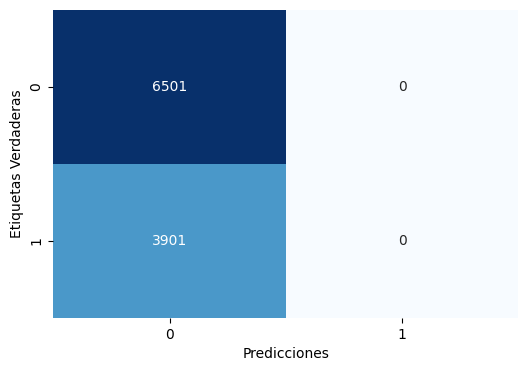

In [ ]:
#ESTANDARIZACION

columnas = ['construction_year', 'price']

scaler = StandardScaler()

df_v5[columnas] = scaler.fit_transform(df_v5[columnas])

#DIVIDO DATOS (X,Y)
X = df_v5[["construction_year"]]

y = df_v5["CARO_BARATO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#CREAR MODELO DE REGRESION
modelo = LogisticRegression()

#ENTRENAR MODELO
modelo.fit(X_train, y_train)

#REALIZAR PREDICCIONES
predicciones = modelo.predict(X_test)

#________________________METRICAS DE EVALUACION del MODELO______________________

#________EXACTITUD________________


precision = accuracy_score(y_test, predicciones)
print("Exactitud del modelo:", precision)

#________PRECISION________________

precision = precision_score(y_test, predicciones)
print("Precisión:", precision)

#_______MATRIZ DE CONFUSION_______

confusion_mat = confusion_matrix(y_test, predicciones)
print("Matriz de Confusión:")
print(confusion_mat)

#Graficar MATRIZ CONFUSION
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

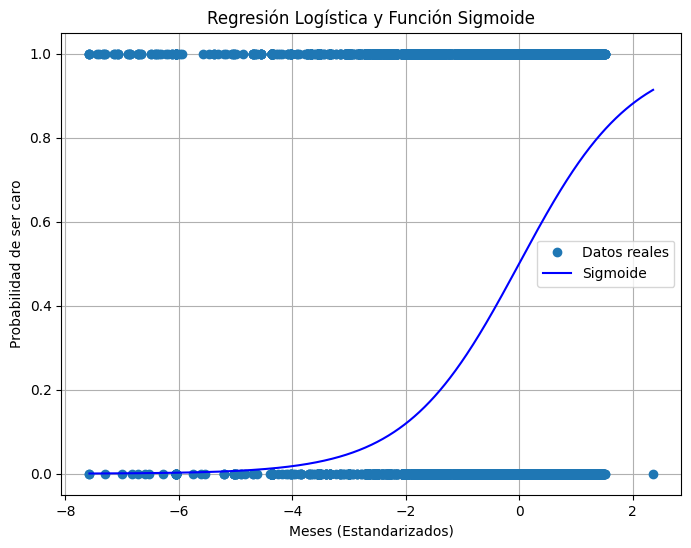

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_range = np.linspace(X.min(), X.max(), 1000)
y_sigmoid = sigmoid(x_range)

plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label='Datos reales')
plt.plot(x_range, y_sigmoid, label='Sigmoide', color='b')
plt.xlabel('Meses (Estandarizados)')
plt.ylabel('Probabilidad de ser caro')
plt.title('Regresión Logística y Función Sigmoide')
plt.grid(True)
plt.legend()